# Complete Modelling Framework for ML Classification Problems
## Author - Atharva Raibagi

## 1. Load Data

To load data from various file types, use the following options:

- **CSV**: `pd.read_csv(file_path)`
- **TXT**: `pd.read_csv(file_path, delimiter='\t')` or `pd.read_table(file_path)`
- **Excel**: `pd.read_excel(file_path)`
- **JSON**: `pd.read_json(file_path)`

### Parameters:
- **file_path**: Path to the data file.
- **file_type**: Type of the file (CSV, TXT, Excel, JSON).

---

## 2. View Data

To inspect the data, utilize the following methods:

- **Head**: `df.head()`
- **Shape**: `df.shape`
- **Describe**: `df.describe()`
- **Info**: `df.info()`

---

## 3. Change Data Type

Convert data types as needed:

- **To Integer**: `df['column_name'] = df['column_name'].astype(int)`
- **To Float**: `df['column_name'] = df['column_name'].astype(float)`
- **To Object/String**: `df['column_name'] = df['column_name'].astype(str)`
- **To Categorical**: `df['column_name'] = df['column_name'].astype('category')`
- **To Boolean**: `df['column_name'] = df['column_name'].astype(bool)`

---

## 4. Group Features by Data Type

Organize features based on their data types:

- **Numerical**: `df.select_dtypes(include=['int', 'float'])`
- **Categorical**: `df.select_dtypes(include=['object', 'category'])`
- **Boolean**: `df.select_dtypes(include=['bool'])`

---

## 5. Handle Null Values

Address missing values appropriately:

- **Numerical**:
  - **Fill with Mean**: `df['column_name'].fillna(df['column_name'].mean(), inplace=True)`
  - **Fill with Median**: `df['column_name'].fillna(df['column_name'].median(), inplace=True)`
  - **Last Observation Carried Forward (LOCF)**: `df['column_name'].fillna(method='ffill', inplace=True)`
  - **Linear Interpolation**: `df['column_name'].interpolate(method='linear', inplace=True)`
  
- **Categorical**:
  - **Fill with Mode**: `df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)`

---

## 6. Handle Duplicates

Remove duplicate rows:

- **Drop Duplicates**: `df.drop_duplicates(inplace=True)`

---

## 7. Visualization

### Histograms for Numerical Features

- **Plot histograms**: Generate subplots for numerical features.

### Bar Plots for Categorical Features

- **Plot bar charts**: Create subplots for categorical features.

### Crosstab for Categorical Features and Target

- **Crosstab Analysis**: `pd.crosstab(df['categorical_feature'], df['target'])`

### Correlation Plot

- **Plot Correlation Matrix**: Visualize correlations between numerical features.

---

## 8. Feature Engineering

### Numerical Features

- **Scaling**:
  - **Min-Max Scaling**
  - **Standard Scaling**
  - **Optimal Binning**: Create bins and replace values with Weight of Evidence (WOE)

### Categorical Features

- **Encoding**:
  - **Label Encoding**
  - **One-Hot Encoding (OHE)**
  - **Weight of Evidence (WOE)**

---

## 9. Train-Test Split

- **Split Data**: Divide data into training and testing sets.

---

## 10. Handle Data Imbalance (Training Set Only)

To address class imbalance in the training set, consider the following techniques:

- **Undersample**: Reduce the number of samples in the majority class.
- **Oversample**: Increase the number of samples in the minority class.
- **SMOTE (Synthetic Minority Over-sampling Technique)**: Generate synthetic samples for the minority class.

---

## 11. Model Training and Evaluation

### Train All Models

- **Train models**: Fit various models on the training data.

### Evaluation Metrics

- **Train Score**: Accuracy score on the training set.
- **Test Score**: Accuracy score on the test set.
- **Performance Table**:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1 Score**
  - **AUC Score**
  - **Classification Report**
  - **Confusion Matrix**
  - **ROC-AUC**
  - **Kolmogorov-Smirnov (KS) Statistic**
  - **Lift**


In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras

In [2]:
def load_data(file_path, file_type):
    """
    Load data from a file based on its type.

    Parameters:
    - file_path (str): The path to the data file.
    - file_type (str): The type of the file ('csv', 'txt', 'excel', 'json').

    Returns:
    - DataFrame: A pandas DataFrame containing the loaded data.
    """
    if file_type == 'csv':
        df = pd.read_csv(file_path)
    elif file_type == 'txt':
        df = pd.read_csv(file_path, delimiter='\t')
    elif file_type == 'excel':
        df = pd.read_excel(file_path)
    elif file_type == 'json':
        df = pd.read_json(file_path)
    else:
        raise ValueError("Unsupported file type. Choose from 'csv', 'txt', 'excel', or 'json'.")
    
    return df

In [3]:
def view_data(df):
    """
    View data details such as head, shape, description, and info.

    Parameters:
    - df (DataFrame): A pandas DataFrame to view.

    Returns:
    - None: Prints data details.
    """
    # Display the first 5 rows of the DataFrame
    print("# Head of the DataFrame:")
    print(df.iloc[:5, :])
    print("\n")

    # Display the shape of the DataFrame
    print("# Shape of the DataFrame:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("\n")

    # Display basic statistics of the DataFrame
    print("# Statistical Summary of Numerical Features:")
    for col in df.select_dtypes(include=['int', 'float']).columns:
        print(f"\nSummary of '{col}':")
        print(f"  Mean: {df[col].mean()}")
        print(f"  Median: {df[col].median()}")
        print(f"  Min: {df[col].min()}")
        print(f"  Max: {df[col].max()}")
        print(f"  Std: {df[col].std()}")
        print(f"  Count: {df[col].count()}")
    print("\n")

    # Display column data types and non-null counts
    print("# Information of DataFrame:")
    print(f"Total Rows: {len(df)}")
    print("\nColumn Data Types and Null Counts:")
    for col in df.columns:
        print(f"  {col}: {df[col].dtype}, Null Count: {df[col].isna().sum()}")

# Example Usage
# view_data(df)

In [4]:
def change_data_type(df, column_name, new_type):
    """
    Change the data type of a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): A pandas DataFrame.
    - column_name (str): The name of the column to change the data type.
    - new_type (str): The new data type ('int', 'float', 'str', 'category', 'bool').

    Returns:
    - DataFrame: A pandas DataFrame with the modified column type.
    """
    if new_type == 'int':
        df[column_name] = df[column_name].astype(int)
    elif new_type == 'float':
        df[column_name] = df[column_name].astype(float)
    elif new_type == 'str':
        df[column_name] = df[column_name].astype(str)
    elif new_type == 'category':
        df[column_name] = df[column_name].astype('category')
    elif new_type == 'bool':
        df[column_name] = df[column_name].astype(bool)
    else:
        raise ValueError("Unsupported data type. Choose from 'int', 'float', 'str', 'category', or 'bool'.")
    
    print(f"Data type of '{column_name}' changed to {new_type}.")
    return df

In [5]:
def group_features_by_dtype(df):
    """
    Group features in a DataFrame based on their data types.

    Parameters:
    - df (DataFrame): A pandas DataFrame.

    Returns:
    - dict: A dictionary with grouped features by data type.
    """
    grouped_features = {
        'numerical': df.select_dtypes(include=['int64', 'float64']).columns.tolist(),
        'categorical': df.select_dtypes(include=['object', 'category']).columns.tolist(),
        'boolean': df.select_dtypes(include=['bool']).columns.tolist()
    }

    print("# Grouped Features by Data Type:")
    print(f"Numerical Features: {grouped_features['numerical']}")
    print(f"Categorical Features: {grouped_features['categorical']}")
    print(f"Boolean Features: {grouped_features['boolean']}")

    return grouped_features

In [6]:
def handle_null_values(df):
    """
    Handle missing values in a DataFrame by filling them with appropriate values.

    Numerical columns:
    - Fill with mean
    - Fill with median
    - Fill using linear interpolation

    Categorical columns:
    - Fill with mode

    Parameters:
    - df (DataFrame): A pandas DataFrame.

    Returns:
    - DataFrame: A DataFrame with null values handled.
    """
    # Handling missing values in numerical columns
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[col].isnull().sum() > 0:
            print(f"Handling nulls for numerical column: {col}")
            # Fill with mean
            df[col + '_fill_mean'] = df[col].fillna(df[col].mean())
            # Fill with median
            df[col + '_fill_median'] = df[col].fillna(df[col].median())
            # Fill using linear interpolation
            df[col + '_fill_interpolate'] = df[col].interpolate(method='linear')

    # Handling missing values in categorical columns
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if df[col].isnull().sum() > 0:
            print(f"Handling nulls for categorical column: {col}")
            # Fill with mode
            df[col] = df[col].fillna(df[col].mode()[0])

    print("Null values handled for all columns.")
    return df

In [7]:
def handle_duplicates(df):
    """
    Handle duplicate rows in a DataFrame by dropping them.

    Parameters:
    - df (DataFrame): A pandas DataFrame.

    Returns:
    - DataFrame: A DataFrame with duplicate rows removed.
    """
    # Count the number of duplicate rows
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")

    # Drop duplicate rows
    if duplicate_count > 0:
        df.drop_duplicates(inplace=True)
        print("Duplicate rows have been removed.")
    else:
        print("No duplicate rows found.")

    return df

In [8]:
def visualize_data(df):
    """
    Visualize the data using histograms for numerical features and bar plots for categorical features.

    Parameters:
    - df (DataFrame): A pandas DataFrame.

    Returns:
    - None: Displays plots.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Histograms for numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    df[numerical_features].hist(figsize=(10, 8), bins=20)
    plt.suptitle("Histograms of Numerical Features")
    plt.show()

    # Bar plots for categorical features
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    for col in categorical_features:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=df)
        plt.title(f"Bar Plot of {col}")
        plt.show()

    # Crosstab for categorical features and target
    target = 'target_column'  # Replace with your target column name
    for col in categorical_features:
        if col != target:
            print(pd.crosstab(df[col], df[target]))

    # Correlation plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Plot")
    plt.show()


In [9]:
def feature_engineering(df,target):
    """
    Perform feature engineering including scaling and encoding.

    Parameters:
    - df (DataFrame): A pandas DataFrame.

    Returns:
    - DataFrame: A DataFrame with engineered features.
    """
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
    from category_encoders import WOEEncoder  # pip install category_encoders

    # Numerical features scaling
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if df[target].dtype == 'int64' or df[target].dtype == 'float64': 
        numerical_features.remove(target)
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    # Categorical features encoding
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if df[target].dtype == 'object' or df[target].dtype == 'category': 
        categorical_features.remove(target)
#     encoder = LabelEncoder()
#     for col in categorical_features:
#         df[col] = encoder.fit_transform(df[col])

    # WOE Encoding example
    woe_encoder = WOEEncoder(cols=categorical_features)

In [10]:
def train_test_split_data(df, target, test_size=0.2, random_state=42):
    """
    Split data into training and testing sets.

    Parameters:
    - df (DataFrame): A pandas DataFrame.
    - target (str): The name of the target column.
    - test_size (float): Proportion of the dataset to include in the test split.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - X_train, X_test, y_train, y_test: DataFrames and Series for train-test sets.
    """
    from sklearn.model_selection import train_test_split

    X = df.drop(columns=[target])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f"Data split into train and test sets with test size = {test_size}.")
    return X_train, X_test, y_train, y_test

In [11]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Train multiple models and evaluate them on test data.

    Parameters:
    - X_train (DataFrame): Training features.
    - X_test (DataFrame): Testing features.
    - y_train (Series): Training labels.
    - y_test (Series): Testing labels.

    Returns:
    - DataFrame: A DataFrame with evaluation metrics for each model.
    """
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    import pandas as pd

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier()
        # Add more models as needed
    }

    results = []

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_prob)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC Score': auc_score
        })

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
        
        print(f'Confusion Matrix for {name}')
        print(cm)
        
        print(f'Classification Report for {name}')
        print(cr)

    results_df = pd.DataFrame(results)
    display(results_df)
    print("Model training and evaluation completed.")


In [12]:
def ks_table(X_train, y_train):
    """
    Calculate the KS table for multiple models by creating deciles and grouping by them.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (Series): Training labels.
    - models (dict): Dictionary of model names and initialized model objects.

    Returns:
    - dict: A dictionary of DataFrames containing KS tables for each model.
    """
    from sklearn.metrics import roc_auc_score
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier()
        # Add more models as needed
    }

    # Add the target variable to X_train for creating deciles
    X_train = X_train.copy()
    X_train['target'] = y_train

    ks_tables = {}  # To store KS tables for each model

    for name, model in models.items():
        # Fit the model on training data
        model.fit(X_train.drop(columns=['target']), y_train)

        # Predict probabilities
        X_train['pred_proba'] = model.predict_proba(X_train.drop(columns=['target']))[:, 1]

        # Create deciles based on predicted probabilities
        X_train['decile'] = pd.qcut(X_train['pred_proba'], 10, labels=False, duplicates='drop')

        # Group by deciles to calculate counts and target 1 class count
        ks_df = X_train.groupby('decile').agg(
            total_count=('target', 'size'),
            target_1_count=('target', 'sum')
        ).reset_index()

        # Calculate cumulative distribution for both target=1 and target=0
        ks_df['cum_target_1_count'] = ks_df['target_1_count'].cumsum()
        ks_df['cum_non_target_0_count'] = (ks_df['total_count'] - ks_df['target_1_count']).cumsum()

        # Calculate KS statistic as the maximum difference between cumulative distributions
        ks_df['cum_dist_target_1'] = ks_df['cum_target_1_count'] / ks_df['target_1_count'].sum()
        ks_df['cum_dist_non_target_0'] = ks_df['cum_non_target_0_count'] / (ks_df['total_count'].sum() - ks_df['target_1_count'].sum())
        ks_df['ks_statistic'] = abs(ks_df['cum_dist_target_1'] - ks_df['cum_dist_non_target_0'])

        # Store the KS table for the current model
        ks_tables[name] = ks_df

        print(f"KS table for {name} model:")
        display(ks_df)
        print(f"Maximum KS Statistic for {name}: {ks_df['ks_statistic'].max()}")

#     display(ks_tables)

### Test

In [13]:
df = load_data(r"C:\Users\Atharva\Desktop\rxib\ML Projects\Diabetes_Prediction_Model_Practice\diabetes_prediction\diabetes.csv",'csv')

In [14]:
view_data(df)

# Head of the DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Shape of the DataFrame:
Rows: 768, Columns: 9


# Statistical Summary of Numerical Features:

Summary of 'Pregnancies':
  Mean: 3.8450520833333335
  Median: 3.0
  Min: 0
  Max: 17
  Std: 3.3695780626988623
  Count: 768

Summary of 'Glucose':
  Mean: 120.89453125
  Median: 1

In [15]:
group_features_by_dtype(df)

# Grouped Features by Data Type:
Numerical Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Categorical Features: []
Boolean Features: []


{'numerical': ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'Outcome'],
 'categorical': [],
 'boolean': []}

In [16]:
df = handle_duplicates(df)

Number of duplicate rows: 0
No duplicate rows found.


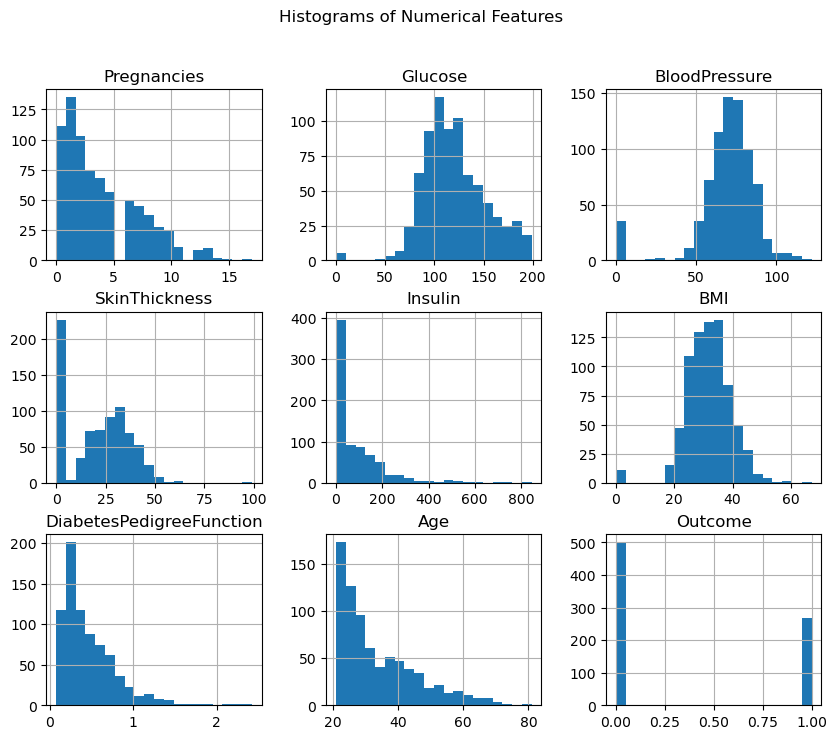

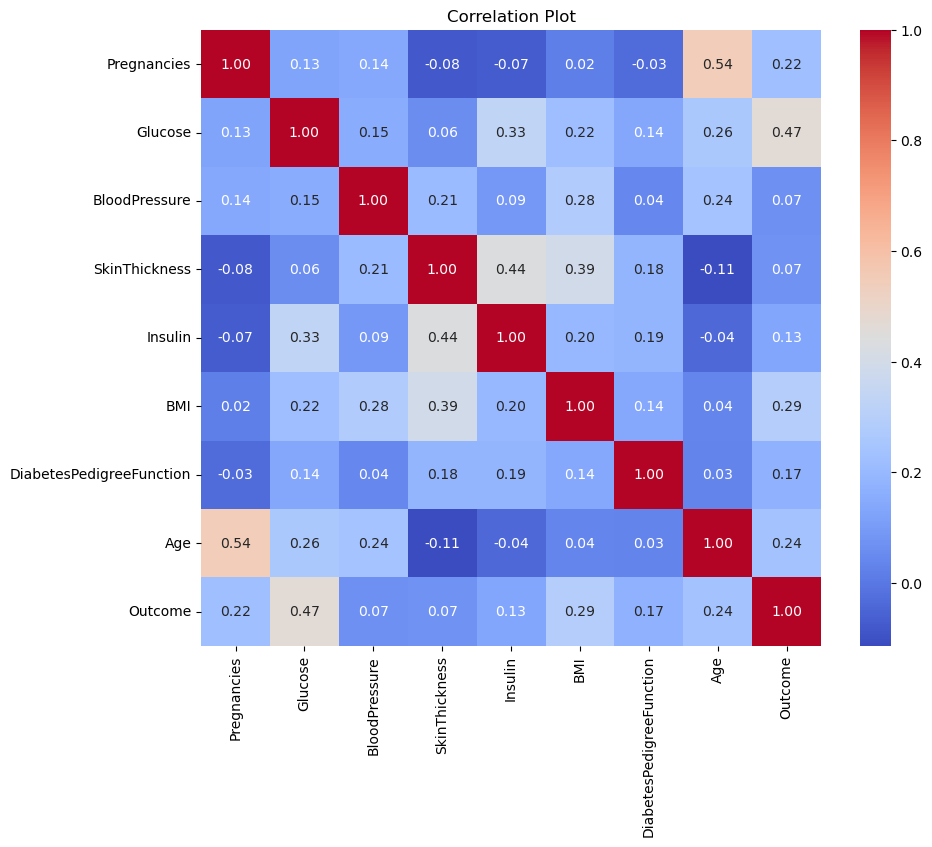

In [17]:
visualize_data(df)

In [18]:
feature_engineering(df,'Outcome')

In [19]:
X_train, X_test, y_train, y_test = train_test_split_data(df,'Outcome')

Data split into train and test sets with test size = 0.2.


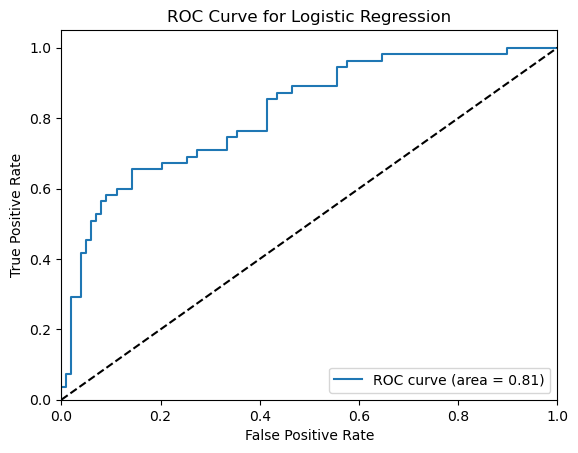

Confusion Matrix for Logistic Regression
[[79 20]
 [18 37]]
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



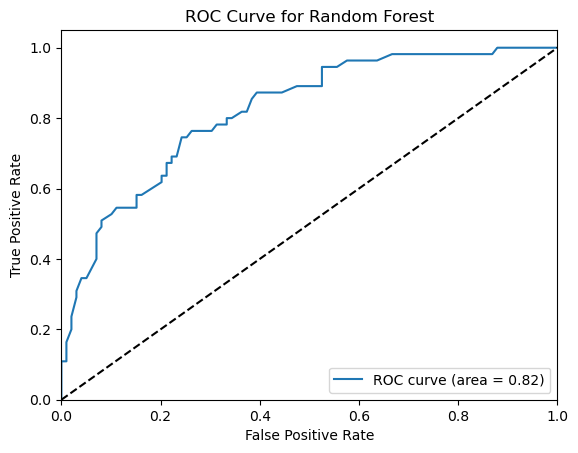

Confusion Matrix for Random Forest
[[78 21]
 [19 36]]
Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.753247,0.649123,0.672727,0.660714,0.814692
1,Random Forest,0.740260,0.631579,0.654545,0.642857,0.820937


Model training and evaluation completed.


In [20]:
train_and_evaluate_models(X_train, X_test, y_train, y_test)

In [21]:
ks_table(X_train, y_train)

KS table for Logistic Regression model:


,decile,total_count,target_1_count,cum_target_1_count,cum_non_target_0_count,cum_dist_target_1,cum_dist_non_target_0,ks_statistic
0,0,62,3,3,59,0.014085,0.147132,0.133048
1,1,61,2,5,118,0.023474,0.294264,0.270790
2,2,61,1,6,178,0.028169,0.443890,0.415721
3,3,62,12,18,228,0.084507,0.568579,0.484072
4,4,61,15,33,274,0.154930,0.683292,0.528362
5,5,61,23,56,312,0.262911,0.778055,0.515144
6,6,62,29,85,345,0.399061,0.860349,0.461288
7,7,61,32,117,374,0.549296,0.932668,0.383373
8,8,61,44,161,391,0.755869,0.975062,0.219194
9,9,62,52,213,401,1.000000,1.000000,0.000000


Maximum KS Statistic for Logistic Regression: 0.5283621931087773
KS table for Random Forest model:


,decile,total_count,target_1_count,cum_target_1_count,cum_non_target_0_count,cum_dist_target_1,cum_dist_non_target_0,ks_statistic
0,0,127,0,0,127,0.000000,0.316708,0.316708
1,1,61,0,0,188,0.000000,0.468828,0.468828
2,2,69,0,0,257,0.000000,0.640898,0.640898
3,3,52,0,0,309,0.000000,0.770574,0.770574
4,4,60,0,0,369,0.000000,0.920200,0.920200
5,5,65,33,33,401,0.154930,1.000000,0.845070
6,6,61,61,94,401,0.441315,1.000000,0.558685
7,7,64,64,158,401,0.741784,1.000000,0.258216
8,8,55,55,213,401,1.000000,1.000000,0.000000


Maximum KS Statistic for Random Forest: 0.9201995012468828
